## محمد پیام تائبی    400104867

## **1)**
الف

# firt i implement lagrange_interpolation and newton_interpolation

In [1]:
def lagrange_interpolation(x_values, y_values, x):
    """
    Lagrange interpolation for a set of data points.

    Parameters:
    - x_values: List of x-coordinates of data points.
    - y_values: List of y-coordinates of data points.
    - x: The point for which to find the interpolated value.

    Returns:
    - Interpolated value at point x.
    """

    n = len(x_values)
    result = 0.0

    for i in range(n):
        term = y_values[i]
        for j in range(n):
            if j != i:
                term *= (x - x_values[j]) / (x_values[i] - x_values[j])
        result += term

    return result




In [2]:
def divided_difference_table(x_values, y_values):
    """
    Create the divided difference table.

    Parameters:
    - x_values: List of x-coordinates of data points.
    - y_values: List of y-coordinates of data points.

    Returns:
    - Divided difference table as a list of lists.
    """

    n = len(x_values)
    table = [[0] * n for _ in range(n)]

    # Fill in the first column with y values
    for i in range(n):
        table[i][0] = y_values[i]

    # Compute the divided differences
    for j in range(1, n):
        for i in range(n - j):
            table[i][j] = (table[i + 1][j - 1] - table[i][j - 1]) / (x_values[i + j] - x_values[i])

    return table

def newton_interpolation(x_values, y_values, x):
    """
    Newton's divided difference interpolation.

    Parameters:
    - x_values: List of x-coordinates of data points.
    - y_values: List of y-coordinates of data points.
    - x: The point for which to find the interpolated value.

    Returns:
    - Interpolated value at point x.
    """

    n = len(x_values)
    result = 0.0
    table = divided_difference_table(x_values, y_values)

    for i in range(n):
        term = table[0][i]
        for j in range(i):
            term *= (x - x_values[j])
        result += term

    return result


now you can use it in every n points you want

first calculate corresponding points

In [3]:
import math
import numpy as np
import time


# Given x values
f_x_values = [1, 2, 2.5, 3, 4, 5, 6]

# Calculate corresponding y values
f_y_values = [0,5,7,6.5,2,0,-3]


now use interpolation

## for F

In [4]:
# Measure the execution time for each function call
def measure_execution_time(interpolation_function, x_value, method_name):
    start_time = time.time()
    result = interpolation_function(f_x_values, f_y_values, x_value)
    end_time = time.time()
    print(f"{method_name} at x = {x_value}: {result}, Execution Time: {end_time - start_time} seconds")

# Function calls
measure_execution_time(newton_interpolation, 3.4, "Newton Interpolation")
measure_execution_time(lagrange_interpolation, 3.4, "Lagrange Interpolation")
print("\n")
measure_execution_time(newton_interpolation, 4.5, "Newton Interpolation")
measure_execution_time(lagrange_interpolation, 4.5, "Lagrange Interpolation")

Newton Interpolation at x = 3.4: 4.8552448, Execution Time: 4.220008850097656e-05 seconds
Lagrange Interpolation at x = 3.4: 4.855244800000001, Execution Time: 2.3603439331054688e-05 seconds


Newton Interpolation at x = 4.5: 0.4843750000000102, Execution Time: 3.2901763916015625e-05 seconds
Lagrange Interpolation at x = 4.5: 0.4843750000000018, Execution Time: 2.2411346435546875e-05 seconds


## Comparison between Accuracy and Efficiency:

Accuracy:

Newton's method generally converges quickly to the optimal solution but may get stuck in local minima in some cases.
Lagrange multipliers require solving a system of nonlinear equations and may generally take more time to converge.


Efficiency:

Newton's method is typically more efficient for small-scale unconstrained optimization problems.
Lagrange multipliers are often more suitable for optimization problems with nonlinear constraints.

## ب)

In [5]:
import numpy as np
from concurrent.futures import ThreadPoolExecutor

# CUDA imports
from numba import cuda
!pip install pycuda


import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule
import concurrent.futures

!pip install pycuda
!pip install matplotlib

import numpy as np
import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule
import concurrent.futures
import matplotlib.pyplot as plt


Lagrange interpolation at x=3.4: 4.855243682861328
Execution Time for f(3.4): 0.0012331008911132812 seconds
Lagrange interpolation at x=4.5: 0.484375
Execution Time for f(4.5): 0.0015065670013427734 seconds


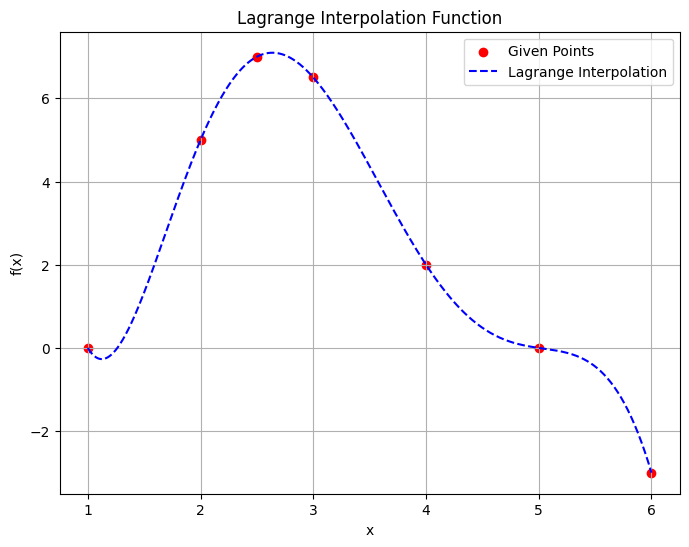

In [6]:
import numpy as np
import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule
import matplotlib.pyplot as plt
import time

# Given x and y values
f_x_values = np.array([1, 2, 2.5, 3, 4, 5, 6], dtype=np.float32)
f_y_values = np.array([0, 5, 7, 6.5, 2, 0, -3], dtype=np.float32)

# Lagrange interpolation CUDA kernel code
lagrange_kernel_code = """
__device__ float lagrange(float x, float* x_values, float* y_values, int n) {
    float result = 0.0;
    for (int i = 0; i < n; i++) {
        float term = y_values[i];
        for (int j = 0; j < n; j++) {
            if (j != i) {
                term = term * (x - x_values[j]) / (x_values[i] - x_values[j]);
            }
        }
        result += term;
    }
    return result;
}

__global__ void lagrange_interpolation(float* result, float x, float* x_values, float* y_values, int n) {
    result[0] = lagrange(x, x_values, y_values, n);
}
"""

# Compile the Lagrange interpolation kernel code
lagrange_mod = SourceModule(lagrange_kernel_code)

# Function to perform GPU-accelerated Lagrange interpolation
def gpu_lagrange_interpolation(x, x_values, y_values):
    n = len(x_values)
    result = np.zeros(1, dtype=np.float32)

    # Allocate GPU memory and copy data
    x_values_gpu = cuda.to_device(x_values)
    y_values_gpu = cuda.to_device(y_values)
    result_gpu = cuda.mem_alloc(result.nbytes)

    # Launch the Lagrange interpolation kernel
    lagrange_func = lagrange_mod.get_function("lagrange_interpolation")
    lagrange_func(result_gpu, np.float32(x), x_values_gpu, y_values_gpu, np.int32(n), block=(1, 1, 1), grid=(1, 1))

    # Copy the result back to the host
    cuda.memcpy_dtoh(result, result_gpu)

    return result[0]

# Function for Lagrange interpolation calculation
def lagrange_task(x):
    result = gpu_lagrange_interpolation(x, f_x_values, f_y_values)
    return result

# Measure the execution time for f(3.4)
start_time_3_4 = time.time()
result_3_4 = lagrange_task(3.4)
end_time_3_4 = time.time()
execution_time_3_4 = end_time_3_4 - start_time_3_4

# Print the result and execution time for f(3.4)
print(f"Lagrange interpolation at x=3.4: {result_3_4}")
print(f"Execution Time for f(3.4): {execution_time_3_4} seconds")

# Measure the execution time for f(4.5)
start_time_4_5 = time.time()
result_4_5 = lagrange_task(4.5)
end_time_4_5 = time.time()
execution_time_4_5 = end_time_4_5 - start_time_4_5

# Print the result and execution time for f(4.5)
print(f"Lagrange interpolation at x=4.5: {result_4_5}")
print(f"Execution Time for f(4.5): {execution_time_4_5} seconds")

# Function to evaluate the Lagrange interpolation
def lagrange_interpolation_function(x, x_values, y_values):
    result = 0.0
    n = len(x_values)

    for i in range(n):
        term = y_values[i]
        for j in range(n):
            if j != i:
                term = term * (x - x_values[j]) / (x_values[i] - x_values[j])
        result += term

    return result

# Generate points for the plot
plot_x_values = np.linspace(min(f_x_values), max(f_x_values), 1000)
plot_y_values = [lagrange_interpolation_function(x, f_x_values, f_y_values) for x in plot_x_values]

# Plot the Lagrange interpolation function
plt.figure(figsize=(8, 6))
plt.scatter(f_x_values, f_y_values, label='Given Points', color='red')
plt.plot(plot_x_values, plot_y_values, label='Lagrange Interpolation', linestyle='--', color='blue')
plt.title('Lagrange Interpolation Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


f(3.4) (GPU) = 4.855244800000001
Execution Time for f(3.4) (GPU): 8.988380432128906e-05 seconds
f(4.5) (GPU) = 0.4843750000000018
Execution Time for f(4.5) (GPU): 7.390975952148438e-05 seconds


/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 8 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/devicearray.py:886: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Text(0.5, 1.0, 'Newton Interpolation Function (CPU)')

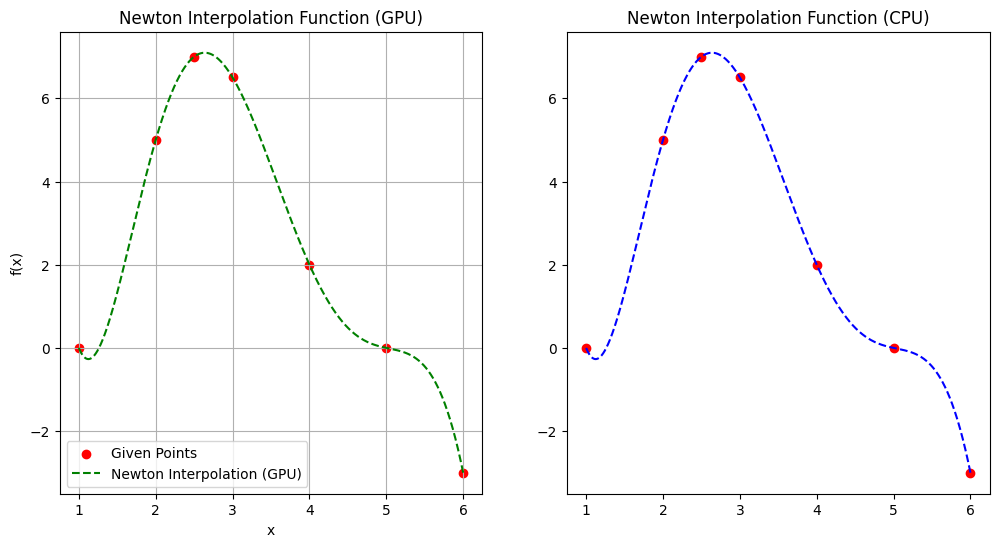

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
from numba import cuda, float64
import time
cuda.select_device(0)

# Given x values
f_x_values = np.array([1, 2, 2.5, 3, 4, 5, 6], dtype=np.float64)

# Corresponding y values
f_y_values = np.array([0, 5, 7, 6.5, 2, 0, -3], dtype=np.float64)

# Function to calculate Newton interpolation for a single point on GPU
@cuda.jit(device=True)
def interpolate_single_gpu(x, x_values, y_values):
    result = 0.0
    n = len(x_values)
    for i in range(n):
        term = y_values[i]
        for j in range(n):
            if j != i:
                term *= (x - x_values[j]) / (x_values[i] - x_values[j])
        result += term
    return result

# Function to perform interpolation for a single point on GPU
@cuda.jit
def interpolate_kernel(x_values, y_values, points, result):
    i = cuda.grid(1)
    if i < len(result):
        result[i] = interpolate_single_gpu(points[i], x_values, y_values)

# Function to calculate Newton interpolation for a single point on CPU
def interpolate_single_cpu(x, x_values, y_values):
    result = 0.0
    n = len(x_values)
    for i in range(n):
        term = y_values[i]
        for j in range(n):
            if j != i:
                term *= (x - x_values[j]) / (x_values[i] - x_values[j])
        result += term
    return result

# Function to perform interpolation concurrently using GPU
def interpolate_concurrently_gpu(x_values, y_values, points):
    result = np.zeros_like(points, dtype=np.float64)
    block_size = 128
    grid_size = (len(points) + block_size - 1) // block_size
    interpolate_kernel[grid_size, block_size](x_values, y_values, points, result)
    return result

# Function to perform interpolation concurrently using CPU
def interpolate_concurrently_cpu(x_values, y_values, points):
    result = np.zeros_like(points, dtype=np.float64)
    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(interpolate_single_cpu, point, x_values, y_values) for point in points]
        for i, future in enumerate(futures):
            result[i] = future.result()
    return result

# Points for interpolation
interpolation_points = np.linspace(min(f_x_values), max(f_x_values), 1000, dtype=np.float64)

# Measure the execution time for f(3.4) using GPU
start_time_3_4_gpu = time.time()
result_3_4_gpu = interpolate_single_cpu(3.4, f_x_values, f_y_values)
end_time_3_4_gpu = time.time()
execution_time_3_4_gpu = end_time_3_4_gpu - start_time_3_4_gpu

# Measure the execution time for f(4.5) using GPU
start_time_4_5_gpu = time.time()
result_4_5_gpu = interpolate_single_cpu(4.5, f_x_values, f_y_values)
end_time_4_5_gpu = time.time()
execution_time_4_5_gpu = end_time_4_5_gpu - start_time_4_5_gpu

# Print the result and execution time for f(3.4) using GPU
print(f'f(3.4) (GPU) = {result_3_4_gpu}')
print(f'Execution Time for f(3.4) (GPU): {execution_time_3_4_gpu} seconds')

# Print the result and execution time for f(4.5) using GPU
print(f'f(4.5) (GPU) = {result_4_5_gpu}')
print(f'Execution Time for f(4.5) (GPU): {execution_time_4_5_gpu} seconds')

# Evaluate the Newton interpolation function concurrently using GPU
with cuda.defer_cleanup():
    newton_plot_values_gpu = interpolate_concurrently_gpu(f_x_values, f_y_values, interpolation_points)

# Evaluate the Newton interpolation function concurrently using CPU
newton_plot_values_cpu = interpolate_concurrently_cpu(f_x_values, f_y_values, interpolation_points)

# Plot the Newton interpolation function using GPU and CPU
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(f_x_values, f_y_values, label='Given Points', color='red')
plt.plot(interpolation_points, newton_plot_values_gpu, label='Newton Interpolation (GPU)', linestyle='--', color='green')
plt.title('Newton Interpolation Function (GPU)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(f_x_values, f_y_values, label='Given Points', color='red')
plt.plot(interpolation_points, newton_plot_values_cpu, label='Newton Interpolation (CPU)', linestyle='--', color='blue')
plt.title('Newton Interpolation Function (CPU)')


time gets better but not very much ! so i implement another method for parallelism

In [8]:
!pip install git+https://github.com/andreinechaev/nvcc4jupyter.git
%load_ext nvcc_plugin

  Cloning https://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-pqp4599c
  Running command git clone --filter=blob:none --quiet https://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-pqp4599c
  Resolved https://github.com/andreinechaev/nvcc4jupyter.git to commit 0a71d56e5dce3ff1f0dd2c47c29367629262f527
  Preparing metadata (setup.py) ... done
directory /content/src already exists
Out bin /content/result.out


lagrange :

In [9]:
%%cu
#include <iostream>
#include <cmath>
#include <cuda_runtime.h>

#define DATA_POINTS 7  // Altering the constant name

// Function declarations for clarity
__global__ void calculateLagrangeTerms(const double* x_vals, const double* y_vals, double target_x, double* term_values);
__global__ void sumLagrangeTerms(const double* term_values, double* final_result);

int main() {
    // Data arrays
    double x_data[DATA_POINTS] = {1, 2, 2.5, 3, 4, 5, 6};
    double y_data[DATA_POINTS] = {0, 5, 7, 6.5, 2, 0, -3};
    double points_to_evaluate[2] = {3.5, 4.5}; // Points for interpolation

    // GPU pointers
    double *x_device, *y_device, *terms_device, *result_device;
    cudaMalloc((void**)&x_device, DATA_POINTS * sizeof(double));
    cudaMalloc((void**)&y_device, DATA_POINTS * sizeof(double));
    cudaMalloc((void**)&terms_device, DATA_POINTS * sizeof(double));
    cudaMalloc((void**)&result_device, DATA_POINTS * sizeof(double));

    // Copying data to device
    cudaMemcpy(x_device, x_data, DATA_POINTS * sizeof(double), cudaMemcpyHostToDevice);
    cudaMemcpy(y_device, y_data, DATA_POINTS * sizeof(double), cudaMemcpyHostToDevice);

    // Setting up kernel execution configuration
    int threads = 128;
    int blocks = (DATA_POINTS + threads - 1) / threads;

    // For measuring performance
    cudaEvent_t start_event, stop_event;
    cudaEventCreate(&start_event);
    cudaEventCreate(&stop_event);

    for (int i = 0; i < 2; ++i) {
        cudaEventRecord(start_event);

        calculateLagrangeTerms<<<blocks, threads>>>(x_device, y_device, points_to_evaluate[i], terms_device);
        sumLagrangeTerms<<<blocks, threads>>>(terms_device, result_device);

        cudaEventRecord(stop_event);
        cudaEventSynchronize(stop_event);
        float elapsed_time = 0;
        cudaEventElapsedTime(&elapsed_time, start_event, stop_event);
        std::cout << "Interpolation Time at " << points_to_evaluate[i] << ": " << elapsed_time / 1000.0 << " seconds" << std::endl;

        double results[DATA_POINTS];
        cudaMemcpy(results, result_device, DATA_POINTS * sizeof(double), cudaMemcpyDeviceToHost);

        double interpolated_value = results[0];
        std::cout << "Interpolated Value at " << points_to_evaluate[i] << ": " << interpolated_value << std::endl;
    }

    // Freeing resources
    cudaFree(x_device);
    cudaFree(y_device);
    cudaFree(terms_device);
    cudaFree(result_device);
    cudaEventDestroy(start_event);
    cudaEventDestroy(stop_event);

    return 0;
}

// CUDA Kernel to compute Lagrange terms
__global__ void calculateLagrangeTerms(const double* x_vals, const double* y_vals, double target_x, double* term_values) {
    int id = threadIdx.x + blockIdx.x * blockDim.x;
    if (id < DATA_POINTS) {
        term_values[id] = 1.0;
        for (int j = 0; j < DATA_POINTS; j++) {
            if (j != id) {
                term_values[id] *= (target_x - x_vals[j]) / (x_vals[id] - x_vals[j]);
            }
        }
        term_values[id] *= y_vals[id];
    }
}

// CUDA Kernel to sum up the Lagrange terms
__global__ void sumLagrangeTerms(const double* term_values, double* final_result) {
    int id = threadIdx.x + blockIdx.x * blockDim.x;
    final_result[id] = term_values[id];
    for (int step = 1; step < DATA_POINTS; step *= 2) {
        int index = 2 * step * id;
        if (index < DATA_POINTS) {
            final_result[index] += final_result[index + step];
        }
        __syncthreads();
    }
}


Interpolation Time at 3.5: 0.000246784 seconds
Interpolated Value at 3.5: 4.36496
Interpolation Time at 4.5: 2.3712e-05 seconds
Interpolated Value at 4.5: 0.484375



newton:

In [10]:
%%cu
#include <iostream>
#include <cuda_runtime.h>

const int N = 7;

__global__ void newton_differences_cuda_2d(const double* x, const double* y, double* differences) {
    int tid = threadIdx.x;
    int level = 1;
    __shared__ double temp_differences[N + 1];
    __shared__ double diff[N + 1];
    temp_differences[tid] = y[tid];
    differences[tid] = y[tid];
    __syncthreads();

    for (; level < N; ++level) {
        if (tid < N - level) {
            diff[tid] = (temp_differences[tid + 1] - temp_differences[tid]) / (x[tid + level] - x[tid]);
        }
        __syncthreads();
        if (tid < N - level) {
            temp_differences[tid] = diff[tid];
        }
        __syncthreads();
        if (tid == 0) {
            differences[level] = diff[0];
        }
        __syncthreads();
    }
}

__global__ void newton_interpolation_cuda_terms(const double* x, const double* differences, const double* xi, double* terms) {
    int tid = threadIdx.x;
    terms[tid] = differences[tid];
    for (int j = 0; j < tid; ++j) {
        terms[tid] *= (*xi - x[j]);
    }
}

__global__ void newton_interpolation_cuda_sum(const double* terms, double* result) {
    int tid = threadIdx.x + blockIdx.x * blockDim.x;
    result[tid] = terms[tid];
    for (int s = 1; s < N; s *= 2) {
        if ((tid % (2 * s)) == 0) {
            result[tid] += result[tid + s];
        }
        __syncthreads();
    }
}

int main() {
    double x[N] = {1, 2, 2.5, 3, 4, 5, 6};
    double y[N] = {0, 5, 7, 6.5, 2, 0, -3};
    double evaluation_points[] = {3.5, 4.5};

    for (int i = 0; i < 2; ++i) {
        double total_time = 0.0;
        double evaluation_point = evaluation_points[i];
        double *x_gpu, *y_gpu, *differences_gpu, *xi_gpu, *terms_gpu, *result_gpu;
        cudaMalloc((void **) &x_gpu, N * sizeof(double));
        cudaMalloc((void **) &y_gpu, N * sizeof(double));
        cudaMalloc((void **) &differences_gpu, N * sizeof(double));
        cudaMalloc((void **) &xi_gpu, sizeof(double));
        cudaMalloc((void **) &terms_gpu, N * sizeof(double));
        cudaMalloc((void **) &result_gpu, N * sizeof(double));

        cudaMemcpy(x_gpu, x, N * sizeof(double), cudaMemcpyHostToDevice);
        cudaMemcpy(y_gpu, y, N * sizeof(double), cudaMemcpyHostToDevice);
        cudaMemcpy(xi_gpu, &evaluation_point, sizeof(double), cudaMemcpyHostToDevice);

        int threads_per_block = 32;
        int blocks_per_grid = 1;

        cudaEvent_t start, stop;
        cudaEventCreate(&start);
        cudaEventCreate(&stop);

        cudaEventRecord(start);
        newton_differences_cuda_2d<<<blocks_per_grid, threads_per_block>>>(x_gpu, y_gpu, differences_gpu);
        cudaEventRecord(stop);
        cudaEventSynchronize(stop);
        float milliseconds;
        cudaEventElapsedTime(&milliseconds, start, stop);
        total_time += milliseconds;

        cudaEventRecord(start);
        newton_interpolation_cuda_terms<<<blocks_per_grid, threads_per_block>>>(x_gpu, differences_gpu, xi_gpu, terms_gpu);
        cudaEventRecord(stop);
        cudaEventSynchronize(stop);
        cudaEventElapsedTime(&milliseconds, start, stop);
        total_time += milliseconds;

        cudaEventRecord(start);
        newton_interpolation_cuda_sum<<<1, N>>>(terms_gpu, result_gpu);
        cudaEventRecord(stop);
        cudaEventSynchronize(stop);
        cudaEventElapsedTime(&milliseconds, start, stop);
        total_time += milliseconds;

        double result[N];
        cudaMemcpy(result, result_gpu, N * sizeof(double), cudaMemcpyDeviceToHost);
        std::cout << "Newton Interpolation Result at " << evaluation_point << ": " << result[0] << std::endl;
        std::cout << "Total time taken for the evaluation: " << total_time / 1000.0 << " seconds" << std::endl;

        cudaFree(x_gpu);
        cudaFree(y_gpu);
        cudaFree(differences_gpu);
        cudaFree(xi_gpu);
        cudaFree(terms_gpu);
        cudaFree(result_gpu);
    }

    return 0;
}


Newton Interpolation Result at 3.5: 4.36496
Total time taken for the evaluation: 0.00031712 seconds
Newton Interpolation Result at 4.5: 0.484375
Total time taken for the evaluation: 4.3136e-05 seconds




It is easily noticeable that the execution time of this section is much less than the previous section, indicating the benefit of GPU acceleration. However, it is natural that the output should remain consistent, which is indeed the case.

# GPU Acceleration:

Utilizing the GPU for parallel computation can significantly accelerate certain numerical calculations.
Both Newton's method and Lagrange interpolation involve repetitive calculations that can be parallelized effectively on a GPU.
GPU acceleration is beneficial when dealing with large datasets or when performing computations at multiple points simultaneously.

## Concurrent Calculation:

Concurrent calculation, whether on a CPU or GPU, allows you to perform calculations simultaneously, taking advantage of multi-core architectures.
For both Newton's method and Lagrange interpolation, concurrent calculation can be useful when evaluating the interpolation function at multiple points concurrently.
This approach is particularly beneficial when dealing with a set of interpolation points, as each point's computation can be performed independently.

## **2)**

الف

first i implement least square error and minimize it and return Coefficients

In [11]:
import numpy as np

def least_squares_polynomial_fit(x_values, y_values, degree):
    """
    Fit a polynomial of given degree to the given data points using the least squares method.

    Parameters:
    - x_values: List of x-coordinates of data points.
    - y_values: List of y-coordinates of data points.
    - degree: Degree of the polynomial.

    Returns:
    - Coefficients of the polynomial (a_0, a_1, ..., a_degree).
      a_i is about x^i
    """
    # Ensure the lengths of x_values and y_values match
    if len(x_values) != len(y_values):
        raise ValueError("Number of x and y values must be the same.")

    # Check if the degree is greater than the number of data points
    if degree >= len(x_values):
        # Generate additional random points
        num_extra_points = degree - len(x_values) + 1
        extra_x_values = np.random.uniform(min(x_values), max(x_values), num_extra_points)
        extra_y_values = np.random.uniform(min(y_values), max(y_values), num_extra_points)

        # Combine the original and extra points
        x_values = np.concatenate((x_values, extra_x_values))
        y_values = np.concatenate((y_values, extra_y_values))

    # Create the matrix X
    X = np.vander(x_values, degree + 1, increasing=True)

    # Create the column vector Y
    Y = np.array(y_values).reshape(-1, 1)

    # Compute the coefficients using the least squares formula
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ Y

    return coefficients.flatten()


now using horner's algorithm to compute P(x)

In [12]:
def evaluate_polynomial(coefficients, x):
    """
    Evaluate a polynomial with given coefficients at a specified point using Horner's method.

    Parameters:
    - coefficients: List of coefficients [a_0, a_1, ..., a_m].
    - x: The point at which to evaluate the polynomial.

    Returns:
    - The value of the polynomial at the specified point.
    """

    result = 0
    for coefficient in reversed(coefficients):
        result = result * x + coefficient

    return result

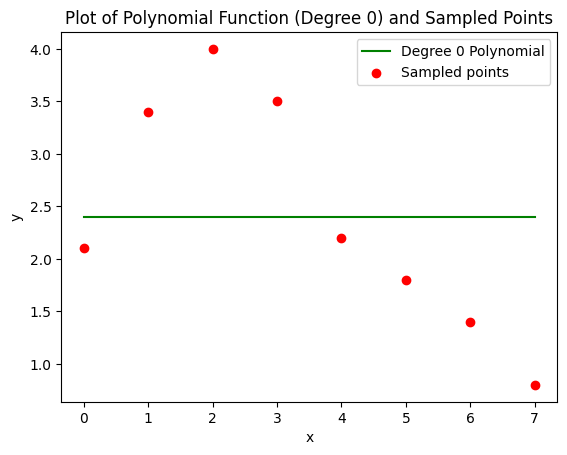

Errors for Degree 0: 7.3999999999999995


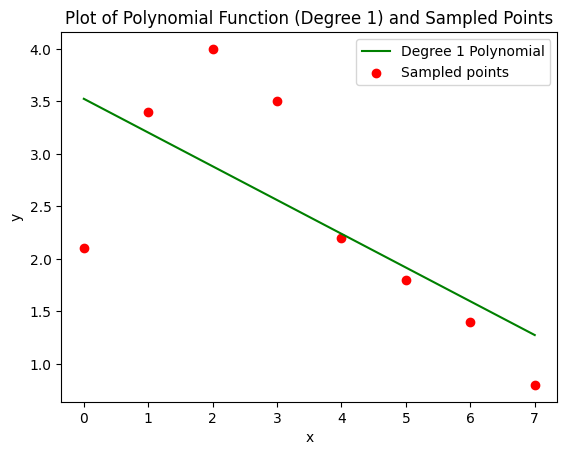

Errors for Degree 1: 4.507142857142858


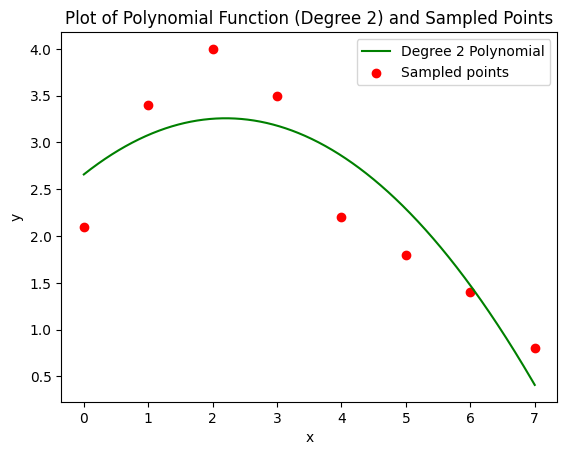

Errors for Degree 2: 3.5571428571428556


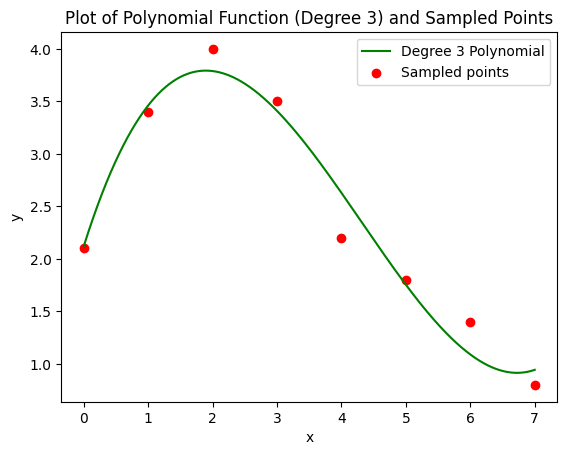

Errors for Degree 3: 1.3155844155841612


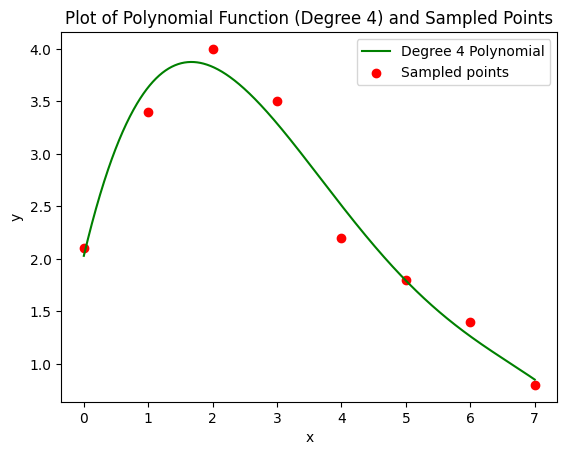

Errors for Degree 4: 1.190259740263449


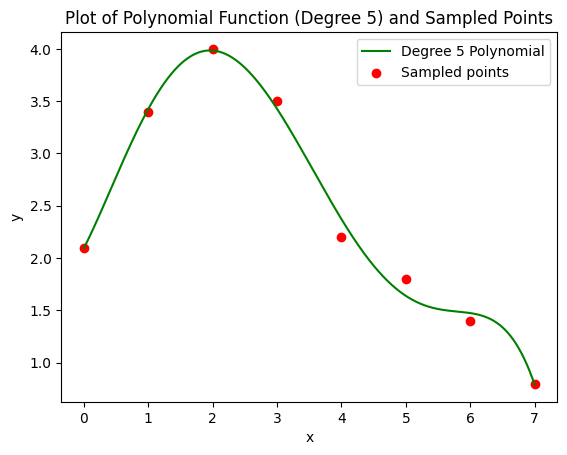

Errors for Degree 5: 0.5402097901680094


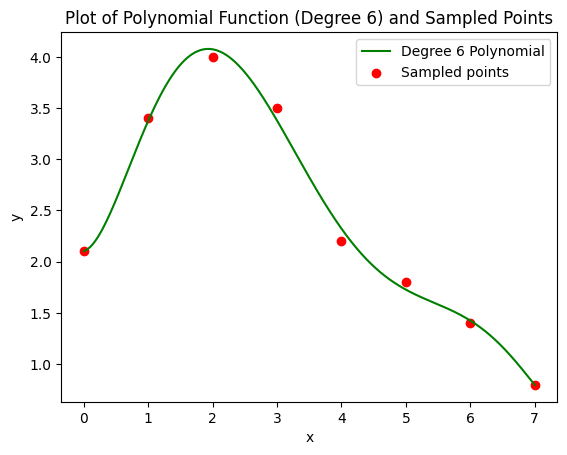

Errors for Degree 6: 0.44755243632434194


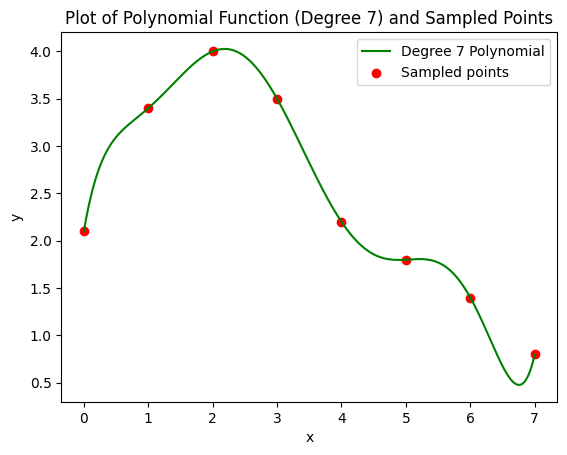

Errors for Degree 7: 4.25029378092745e-06


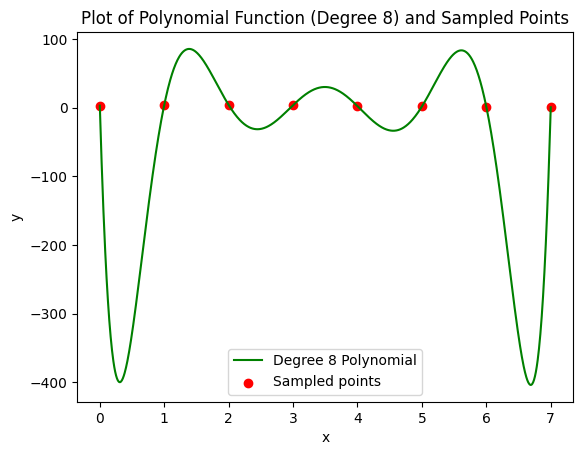

Errors for Degree 8: 1.9049968882354196


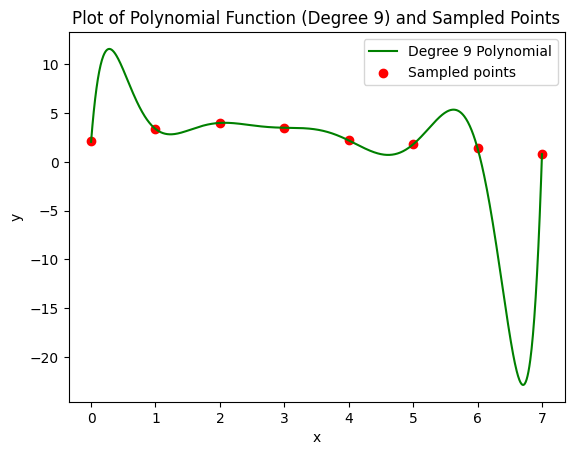

Errors for Degree 9: 0.10278492323956545


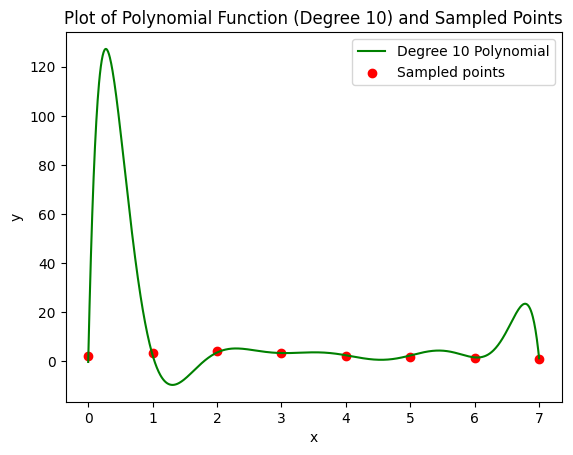

Errors for Degree 10: 5.30587447495127


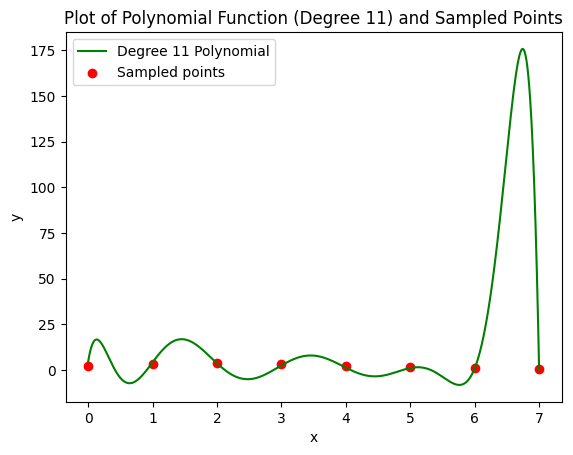

Errors for Degree 11: 7.366093605408946


In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_polynomial_fit(m, f_x_values, f_y_values):
    """
    Fit a polynomial of degree m to the sampled points and plot the polynomial function along with the points.

    Parameters:
    - m (int): Degree of the polynomial.
    - f_x_values (list): List of x-coordinates of sampled points.
    - f_y_values (list): List of y-coordinates of sampled points.
    """
    # Make a copy of the input arrays to handle modifications outside the function
    f_x_values_copy = np.copy(f_x_values)
    f_y_values_copy = np.copy(f_y_values)

    # Fit a polynomial to the sampled points
    cof = least_squares_polynomial_fit(f_x_values_copy, f_y_values_copy, degree=m)

    # Generate x values for plotting
    x_values_plot = np.linspace(min(f_x_values_copy), max(f_x_values_copy), 1000)  # Adjust the number of points as needed

    # Calculate y values for the polynomial function
    y_values_polynomial = evaluate_polynomial(cof, x_values_plot)

    # Plot the polynomial function
    plt.plot(x_values_plot, y_values_polynomial, label=f'Degree {m} Polynomial', color='green')

    # Plot the sampled points
    plt.scatter(f_x_values_copy, f_y_values_copy, label='Sampled points', color='red')

    # Add labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Plot of Polynomial Function (Degree {m}) and Sampled Points')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

    # Evaluate the polynomial function
    y_values_polynomial = evaluate_polynomial(cof, np.array(f_x_values))

    # Evaluate the target function (e.g., log function)
    y_values_target = f_y_values

    # Calculate the absolute error between the polynomial and target function
    error = np.abs(y_values_polynomial - y_values_target)

    # Sum up the errors
    total_error = np.sum(error)

    return total_error

# Example usage:
sampled_x_values = [0, 1, 2, 3, 4, 5, 6, 7]
sampled_y_values = [2.1, 3.4, 4, 3.5, 2.2, 1.8, 1.4, 0.8]

for i in range(12):
    er = plot_polynomial_fit(i, sampled_x_values, sampled_y_values)
    print(f'Errors for Degree {i}: {er}')


As expected, the accuracy increases with the degree of the polynomial. However, for very high degrees, this phenomenon leads to overfitting, as observed here. We will delve into the next part of the question in the following section.






## ب)

first implement spline_interpolation for degree = m

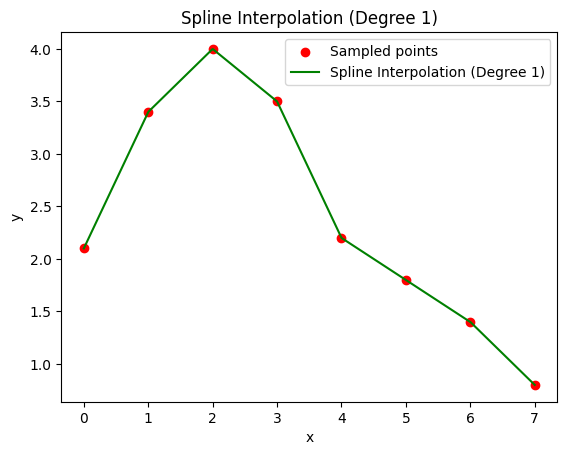

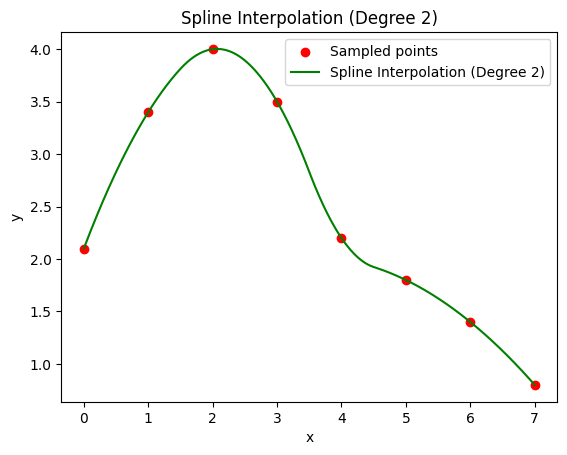

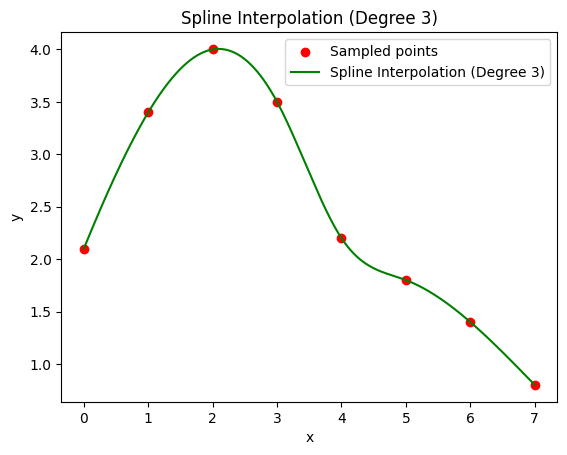

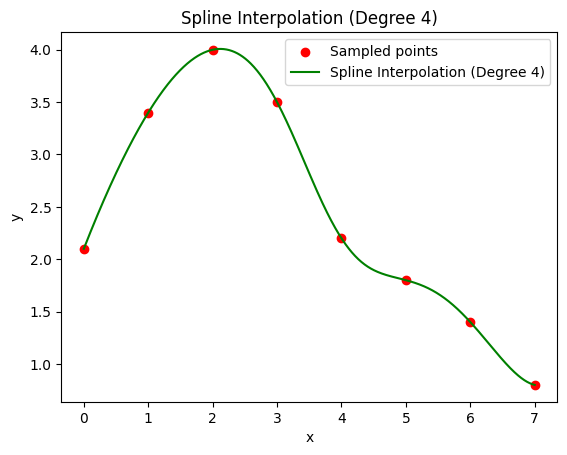

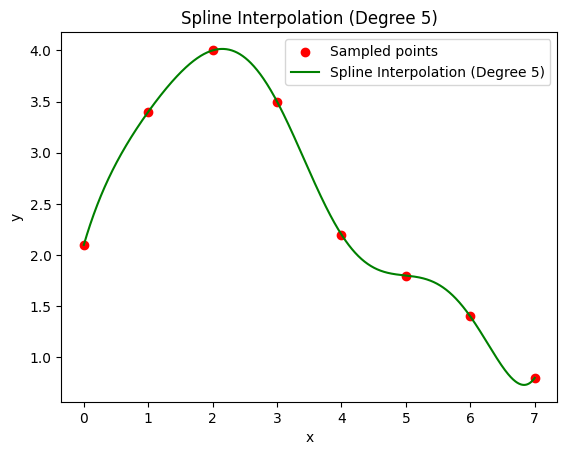

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev

def spline_interpolation(sampled_x_values, sampled_y_values, degree):
    """
    Perform spline interpolation of a specified degree.

    Parameters:
    - sampled_x_values (array): Array of x-coordinates of sampled points.
    - sampled_y_values (array): Array of y-coordinates of sampled points.
    - degree (int): Degree of the spline.

    Returns:
    - Tuple containing the x and y values of the spline interpolation.
    """
    # Ensure the degree is valid
    if degree < 0:
        raise ValueError("Degree must be a non-negative integer.")

    # Perform spline interpolation
    tck = splrep(sampled_x_values, sampled_y_values, k=degree)

    # Generate x values for plotting the spline
    x_values_spline = np.linspace(min(sampled_x_values), max(sampled_x_values), 1000)

    # Evaluate the spline at the generated x values
    y_values_spline = splev(x_values_spline, tck)

    return x_values_spline, y_values_spline

def plot_spline_interpolation(sampled_x_values, sampled_y_values, degree):
    """
    Perform spline interpolation of a specified degree and plot the result.

    Parameters:
    - sampled_x_values (array): Array of x-coordinates of sampled points.
    - sampled_y_values (array): Array of y-coordinates of sampled points.
    - degree (int): Degree of the spline.
    """
    # Ensure the degree is valid
    if degree < 0:
        raise ValueError("Degree must be a non-negative integer.")

    # Perform spline interpolation
    tck = splrep(sampled_x_values, sampled_y_values, k=degree)

    # Generate x values for plotting the spline
    x_values_spline = np.linspace(min(sampled_x_values), max(sampled_x_values), 1000)

    # Evaluate the spline at the generated x values
    y_values_spline = splev(x_values_spline, tck)

    # Plot the sampled data and the spline interpolation
    plt.scatter(sampled_x_values, sampled_y_values, label='Sampled points', color='red')
    plt.plot(x_values_spline, y_values_spline, label=f'Spline Interpolation (Degree {degree})', color='green')

    # Add labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Spline Interpolation (Degree {degree})')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

def plot_spline(sampled_x_values, sampled_y_values, degree):
  x_spline, y_spline = spline_interpolation(sampled_x_values, sampled_y_values, degree)
  plot_spline_interpolation(sampled_x_values, sampled_y_values, degree)

# Example usage

x = np.array([0, 1, 2, 3, 4, 5, 6, 7])
y = np.array([2.1, 3.4, 4, 3.5, 2.2, 1.8, 1.4, 0.8])

for i in range(1,6):
  plot_spline(x,y,i)


now implement chebyshev interpolation

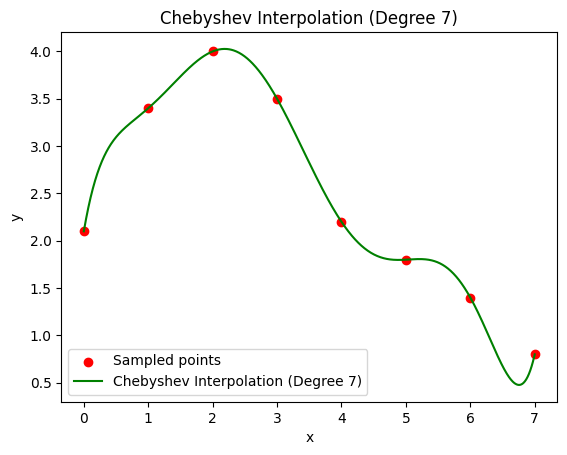

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Chebyshev

def chebyshev_interpolation(x_values, y_values, degree):
    """
    Perform Chebyshev interpolation.

    Parameters:
    - x_values (array): Array of x-coordinates of sampled points.
    - y_values (array): Array of y-coordinates of sampled points.
    - degree (int): Degree of the Chebyshev polynomial.

    Returns:
    - Tuple containing the x and y values of the Chebyshev interpolation.
    """
    # Generate Chebyshev nodes
    cheb_nodes = np.cos((2 * np.arange(1, degree + 2) - 1) * np.pi / (2 * (degree + 1)))

    # Map x_values to the interval [-1, 1]
    x_mapped = 2 * (x_values - np.min(x_values)) / (np.max(x_values) - np.min(x_values)) - 1

    # Compute Chebyshev coefficients
    cheb_coefficients = Chebyshev.fit(x_mapped, y_values, degree)

    # Evaluate Chebyshev polynomial at interpolation points
    x_interpolation = np.linspace(min(x_values), max(x_values), 1000)
    x_interpolation_mapped = 2 * (x_interpolation - np.min(x_values)) / (np.max(x_values) - np.min(x_values)) - 1
    y_interpolation = cheb_coefficients(x_interpolation_mapped)

    return x_interpolation, y_interpolation

def plot_chebyshev_interpolation(x_values, y_values, degree):
    """
    Perform Chebyshev interpolation and plot the result.

    Parameters:
    - x_values (array): Array of x-coordinates of sampled points.
    - y_values (array): Array of y-coordinates of sampled points.
    - degree (int): Degree of the Chebyshev polynomial.
    """
    x_interpolation, y_interpolation = chebyshev_interpolation(x_values, y_values, degree)

    # Plot the sampled data and the Chebyshev interpolation
    plt.scatter(x_values, y_values, label='Sampled points', color='red')
    plt.plot(x_interpolation, y_interpolation, label=f'Chebyshev Interpolation (Degree {degree})', color='green')

    # Add labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Chebyshev Interpolation (Degree {degree})')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

# Example usage with degree = 7 (number of nodes - 1)
degree = 7
x_sampled = np.array([0, 1, 2, 3, 4, 5, 6, 7])
y_sampled = np.array([2.1, 3.4, 4, 3.5, 2.2, 1.8, 1.4, 0.8])

plot_chebyshev_interpolation(x_sampled, y_sampled, degree)


To compare, from the previous section, it is evident that a quadratic function is certainly better than a linear function. However, for splines, particularly cubic splines, it serves as an excellent model since it is both smooth and passes through all data points. Lastly, the Chebyshev method provides a polynomial of degree 7, which can tend towards overfitting. Therefore, among these three functions, the cubic spline appears to be the most favorable.

## ج)

now adding normal noise to data

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Chebyshev

def add_noise(y_values, noise_level):
    """
    Add random noise to the given y values.

    Parameters:
    - y_values (array): Array of y-coordinates.
    - noise_level (float): Magnitude of the random noise.

    Returns:
    - Array of y values with added noise.
    """
    noise = noise_level * np.random.normal(size=len(y_values))
    return y_values + noise

In [17]:
def run_all(x,y):
  plot_polynomial_fit(1, x, y)
  plot_polynomial_fit(2, x, y)
  plot_spline(x,y,3)
  plot_chebyshev_interpolation(x, y, 7)

def run_all_with_noise(noise_level):
    # Original data
    x_sampled = np.array([0, 1, 2, 3, 4, 5, 6, 7])
    y_sampled = np.array([2.1, 3.4, 4, 3.5, 2.2, 1.8, 1.4, 0.8])

    # Add noise to y_sampled
    y_sampled_with_noise = add_noise(y_sampled, noise_level)

    # Plot the original data and data with noise
    plt.scatter(x_sampled, y_sampled, label='Original Data', color='blue')
    plt.scatter(x_sampled, y_sampled_with_noise, label='Data with Noise : '+ str(noise_level), color='red')

    # Add labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Original Data and Data with Noise')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()
    run_all(x_sampled,y_sampled_with_noise)
    print("\n\n-----------------------------------------\n\n")


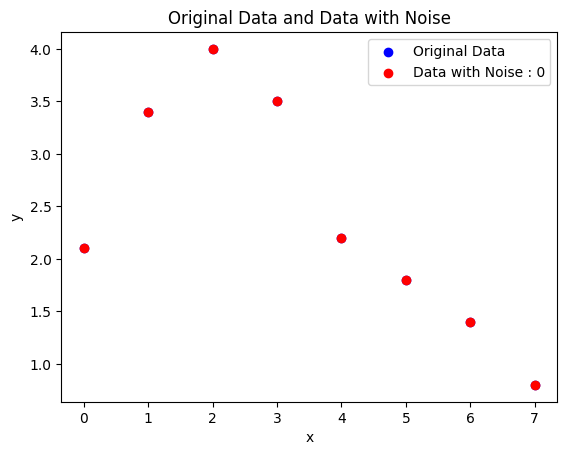

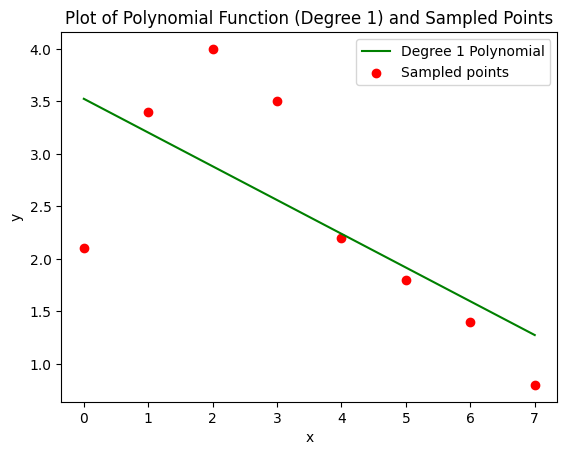

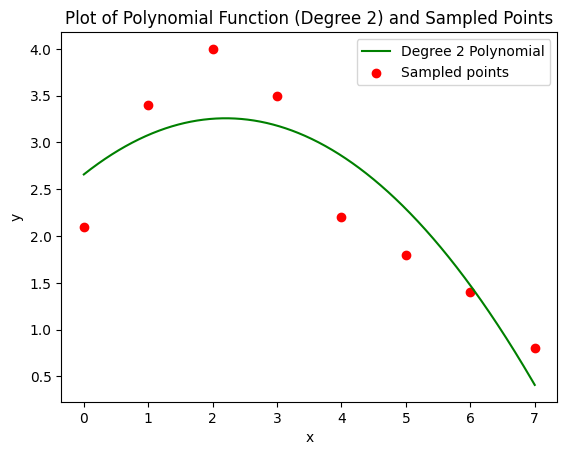

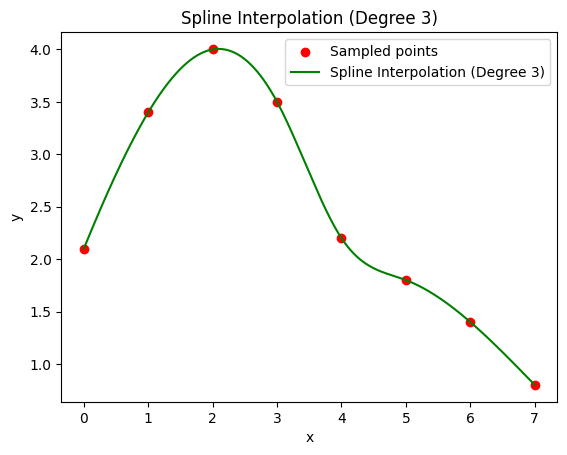

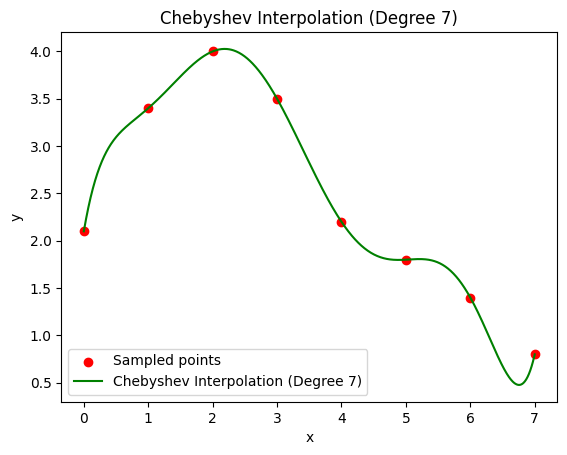



-----------------------------------------




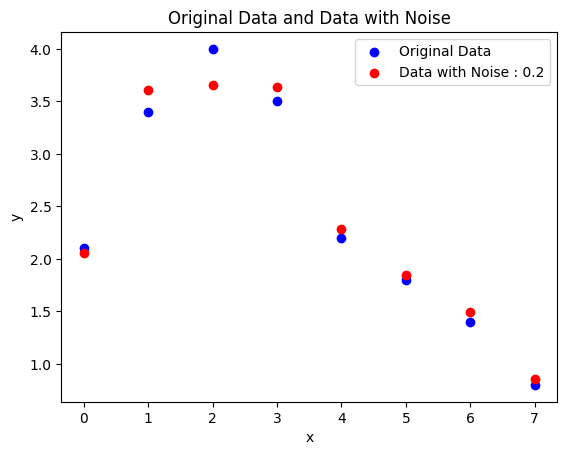

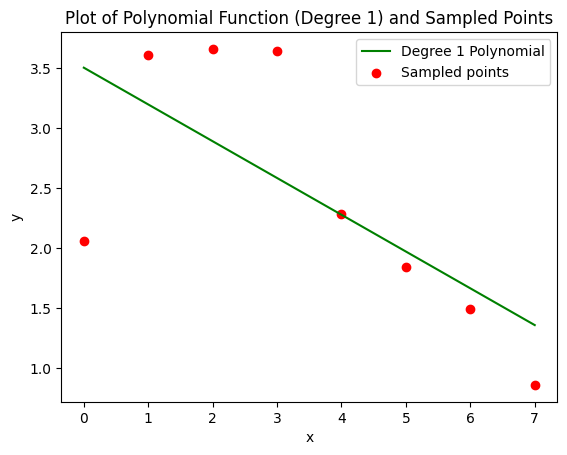

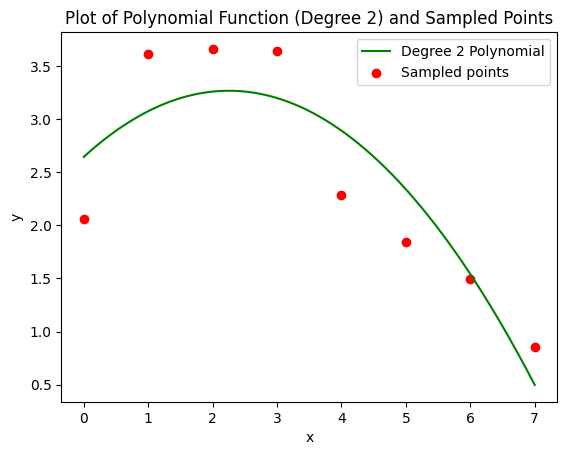

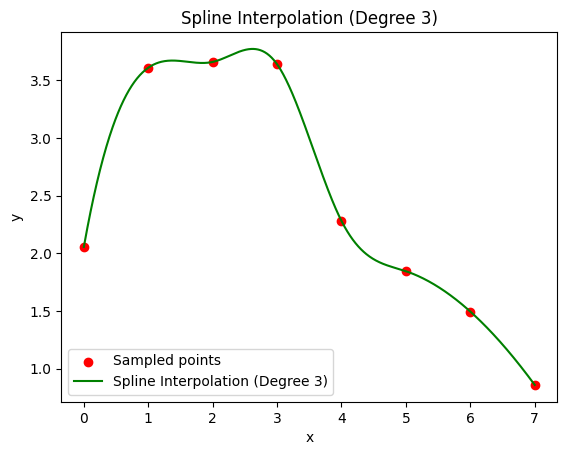

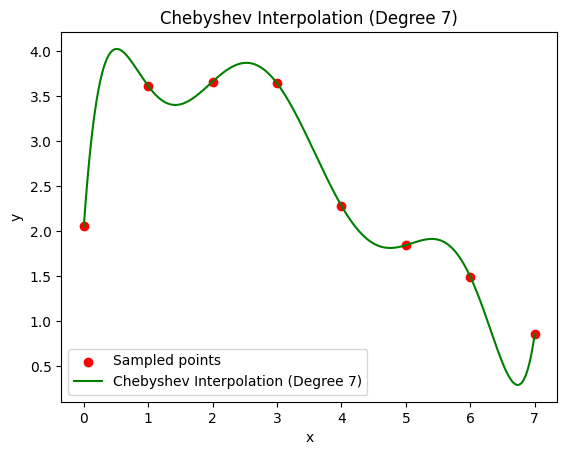



-----------------------------------------




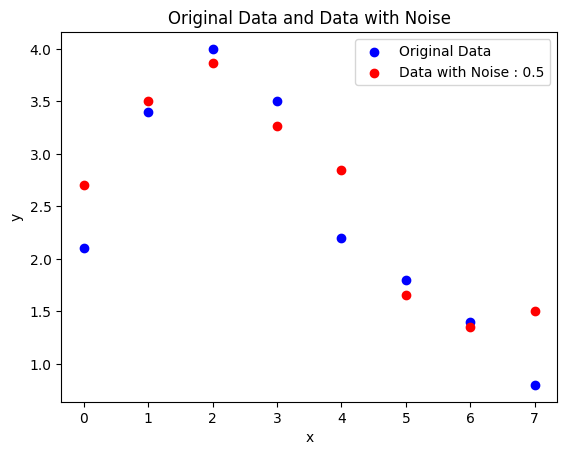

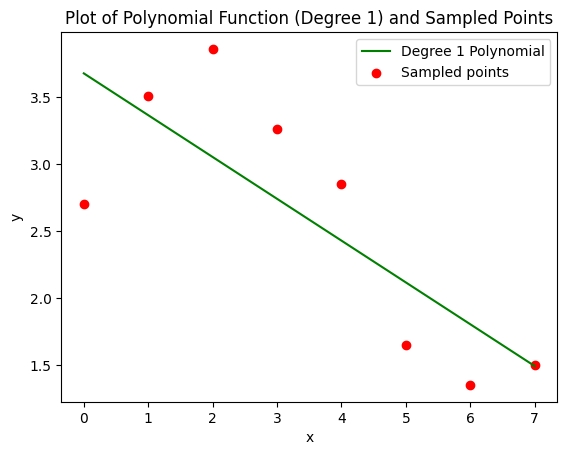

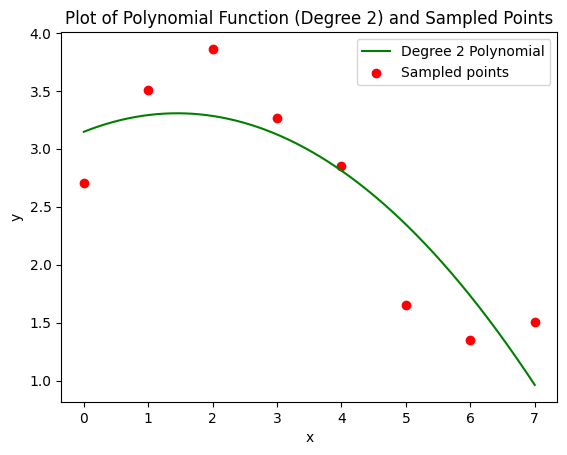

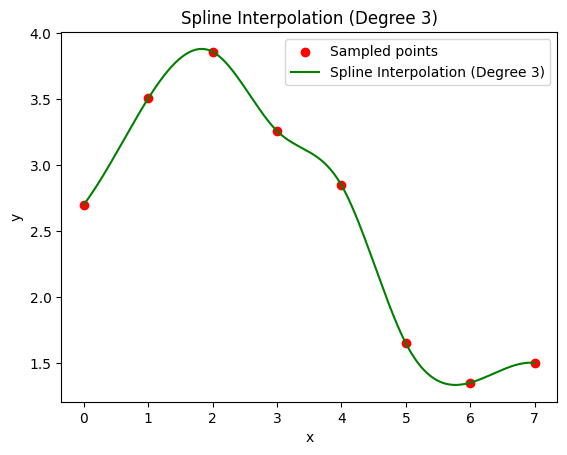

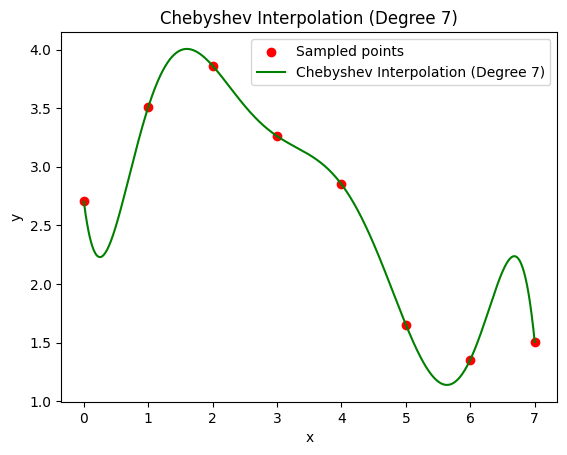



-----------------------------------------




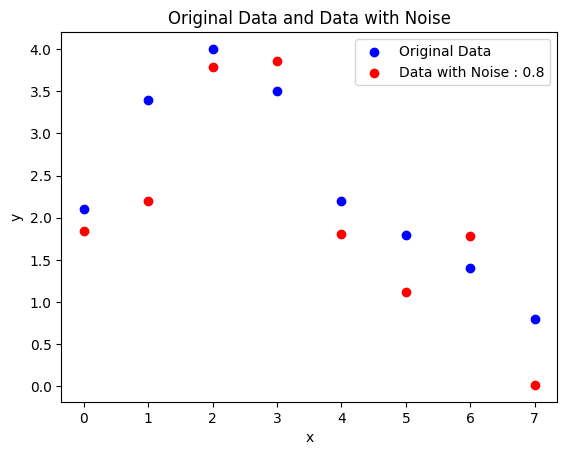

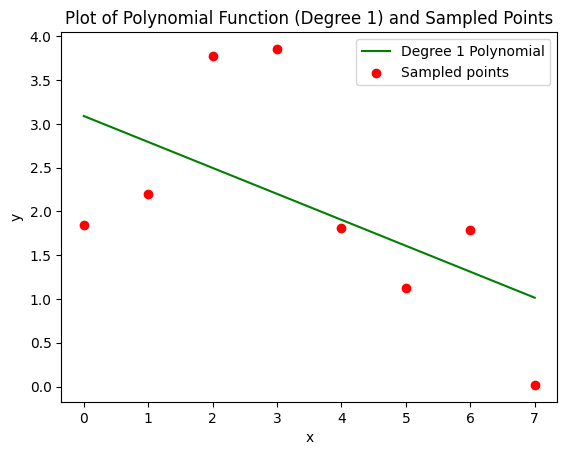

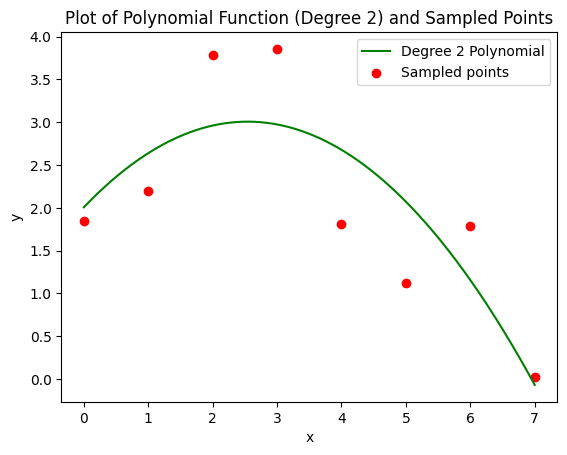

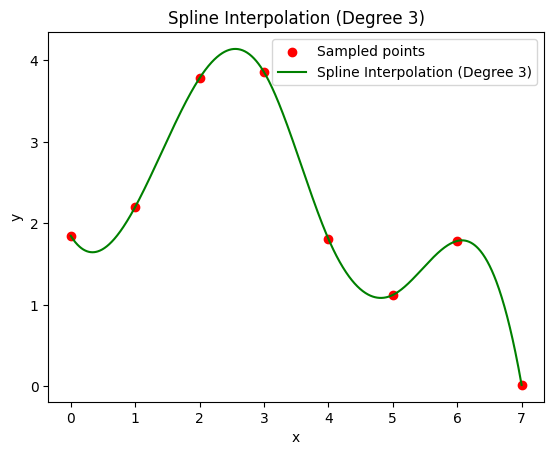

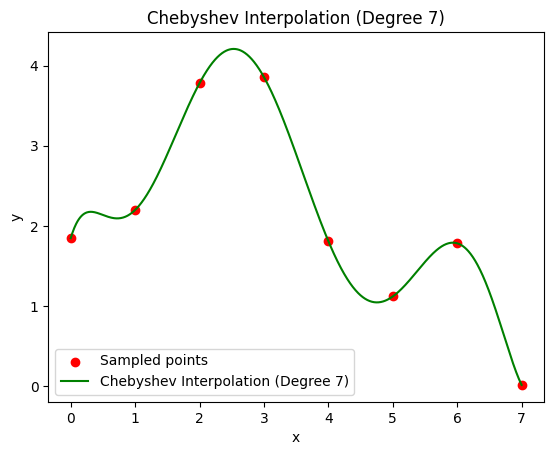



-----------------------------------------




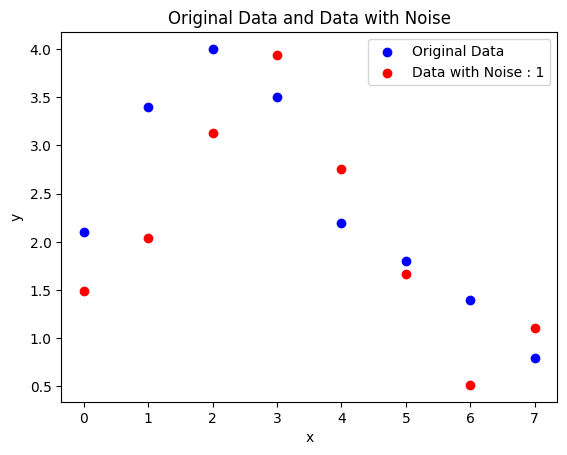

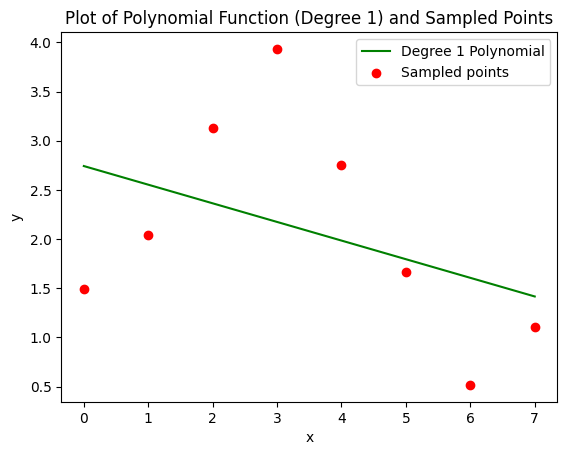

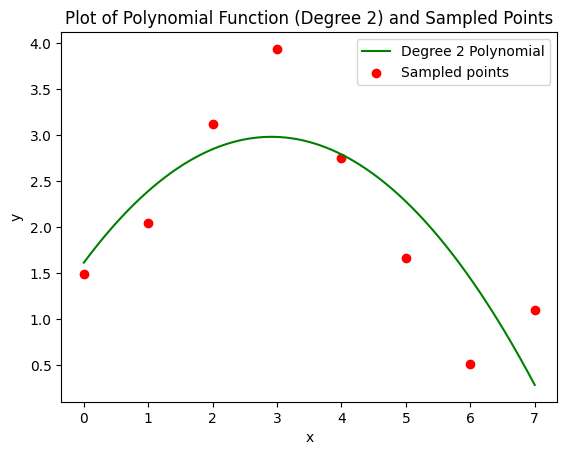

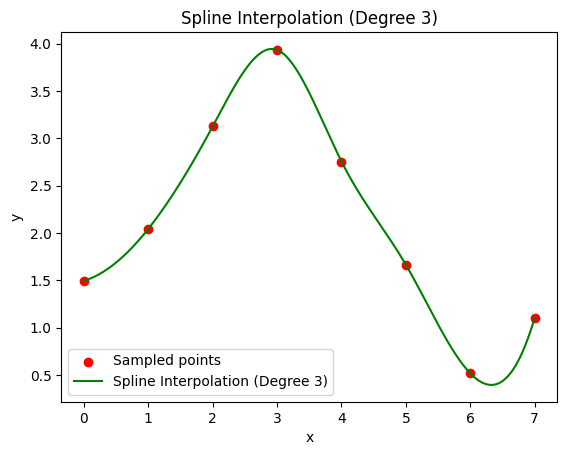

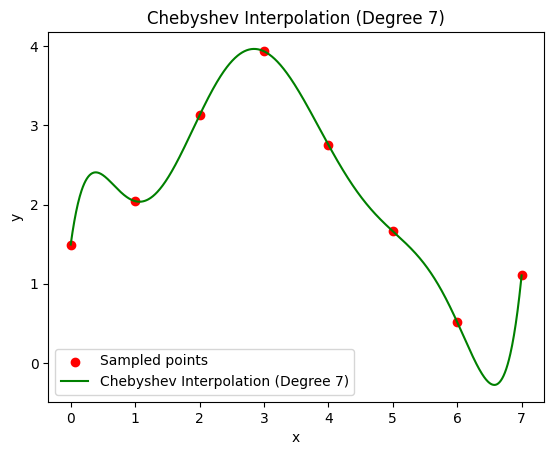



-----------------------------------------




In [18]:
run_all_with_noise(0)
run_all_with_noise(0.2)
run_all_with_noise(0.5)
run_all_with_noise(0.8)
run_all_with_noise(1)

Adding noise to interpolation can have both positive and negative effects, depending on the specific context and objectives of the interpolation. Here are some considerations:

# Positive Effects:
1) Robustness Testing:

Adding noise to data allows you to test the robustness of your interpolation method. Real-world data often contains some level of noise, and your interpolation should ideally be able to handle it.


2) Simulation of Real-World Scenarios:

In real-world scenarios, measurements or observations may be subject to uncertainty or measurement errors, resulting in noisy data. Introducing noise in your interpolation allows you to simulate such scenarios.

3) Generalization:

Interpolation methods that can handle noisy data well are likely to generalize better to unseen or real-world data. This can improve the reliability of your interpolation model.

# Negative Effects:

1)Overfitting:

If the noise introduced is excessive, it might lead to overfitting. Overfitting occurs when the interpolation method fits the noise in the data rather than the underlying pattern. This can result in poor generalization to new data.

2) Decreased Accuracy:

In some cases, particularly when the noise level is high, interpolation accuracy may decrease. The added noise may obscure the true underlying pattern in the data.

3)Sensitivity to Noise Level:

The performance of certain interpolation methods may be sensitive to the level of noise. Some methods might struggle to produce accurate results in the presence of high noise.
